In [2]:
import os
from pathlib import Path
path = Path('/kaggle/input/heart-attack-analysis-prediction-dataset')

In [3]:
import torch, numpy as np, pandas as pd
np.set_printoptions(linewidth=140)
torch.set_printoptions(linewidth=140, sci_mode=False, edgeitems=7)
pd.set_option('display.width', 140)

In [4]:
path

PosixPath('/kaggle/input/heart-attack-analysis-prediction-dataset')

In [5]:
df = pd.read_csv(path/'heart.csv')
df

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [6]:
df["age"].max

<bound method NDFrame._add_numeric_operations.<locals>.max of 0      63
1      37
2      41
3      56
4      57
       ..
298    57
299    45
300    68
301    57
302    57
Name: age, Length: 303, dtype: int64>

In [7]:
df.isna().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

In [8]:
import numpy as np

df.describe(include=(np.number))

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


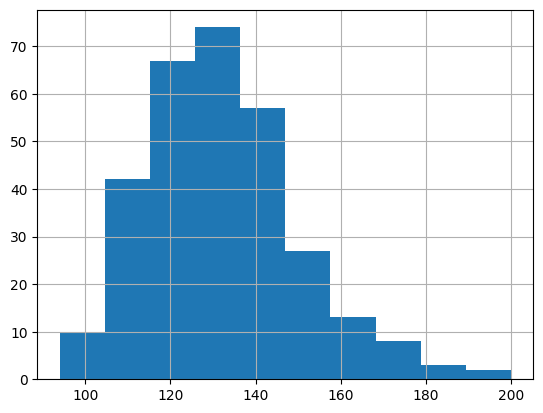

In [9]:
df['trtbps'].hist();

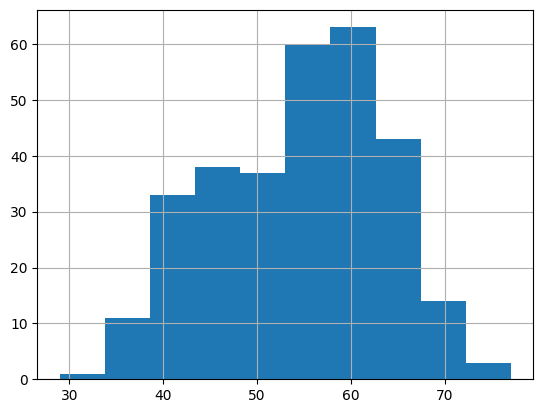

In [10]:
df['age'] .hist();

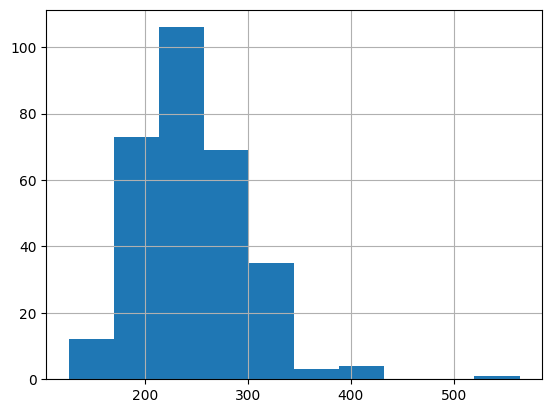

In [11]:
df['chol'].hist();

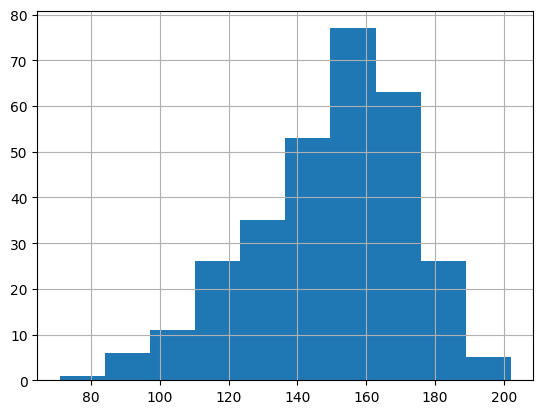

In [12]:
df['thalachh'].hist();

In [13]:
df['Logtrt'] = np.log(df['trtbps']+1)
df['Logage'] = df['age']/df["age"].max()
df['Logchol'] = np.log(df['chol']+1)
df['Logthalachh'] = np.log(df['thalachh']+1)

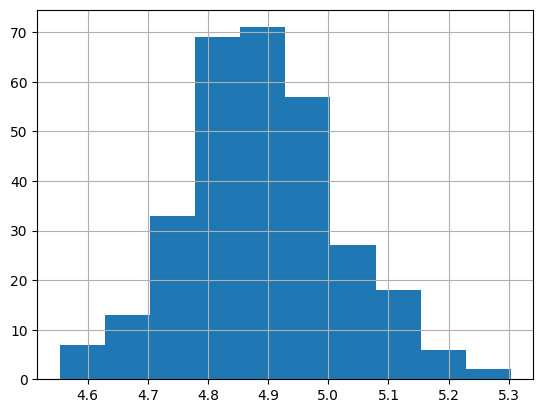

In [14]:
df['Logtrt'].hist();

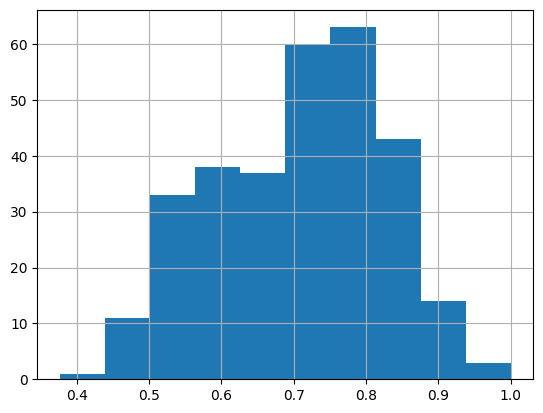

In [15]:
df['Logage'] .hist();

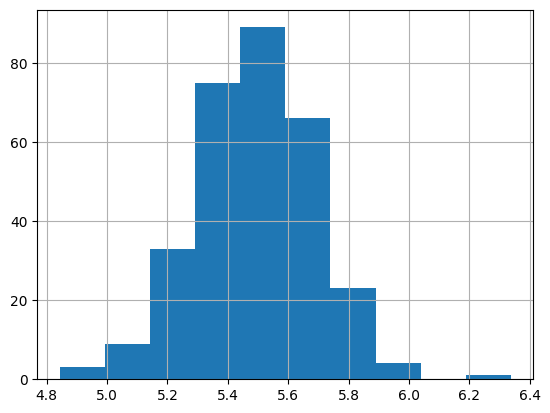

In [16]:
df['Logchol'].hist();

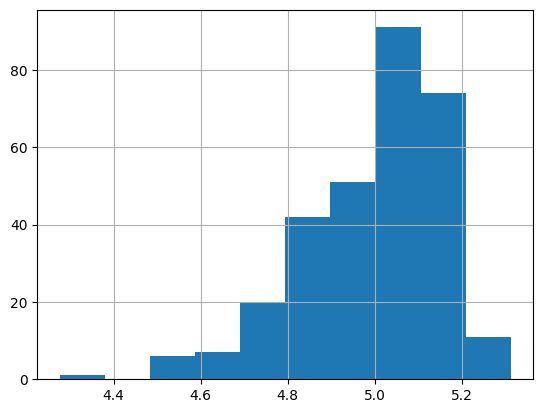

In [17]:
df['Logthalachh'].hist();

In [18]:
df.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output,Logtrt,Logage,Logchol,Logthalachh
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554,4.879093,0.706056,5.489737,5.002297
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835,0.129210,0.117949,0.202952,0.163532
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.553877,0.376623,4.844187,4.276666
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000,4.795791,0.616883,5.356586,4.901557
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000,4.875197,0.714286,5.484797,5.036953
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000,4.948760,0.792208,5.618586,5.117994
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000,5.303305,1.000000,6.336826,5.313206


In [19]:
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output,Logtrt,Logage,Logchol,Logthalachh
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1,4.983607,0.818182,5.455321,5.017280
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1,4.875197,0.480519,5.525453,5.236442
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1,4.875197,0.532468,5.323010,5.153292
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1,4.795791,0.727273,5.468060,5.187386
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1,4.795791,0.740260,5.872118,5.099866


In [20]:
from torch import tensor

t_dep = tensor(df.output)


In [21]:
t_dep

tensor([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [22]:
indep_cols = ['sex', 'cp', 'fbs', 'restecg','exng','oldpeak','slp','caa','thall','Logtrt','Logage','Logchol','Logthalachh']
t_indep = tensor(df[indep_cols].values, dtype=torch.float)
t_indep

tensor([[1.0000, 3.0000, 1.0000, 0.0000, 0.0000, 2.3000, 0.0000, 0.0000, 1.0000, 4.9836, 0.8182, 5.4553, 5.0173],
        [1.0000, 2.0000, 0.0000, 1.0000, 0.0000, 3.5000, 0.0000, 0.0000, 2.0000, 4.8752, 0.4805, 5.5255, 5.2364],
        [0.0000, 1.0000, 0.0000, 0.0000, 0.0000, 1.4000, 2.0000, 0.0000, 2.0000, 4.8752, 0.5325, 5.3230, 5.1533],
        [1.0000, 1.0000, 0.0000, 1.0000, 0.0000, 0.8000, 2.0000, 0.0000, 2.0000, 4.7958, 0.7273, 5.4681, 5.1874],
        [0.0000, 0.0000, 0.0000, 1.0000, 1.0000, 0.6000, 2.0000, 0.0000, 2.0000, 4.7958, 0.7403, 5.8721, 5.0999],
        [1.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.4000, 1.0000, 0.0000, 1.0000, 4.9488, 0.7403, 5.2627, 5.0039],
        [0.0000, 1.0000, 0.0000, 0.0000, 0.0000, 1.3000, 1.0000, 0.0000, 2.0000, 4.9488, 0.7273, 5.6870, 5.0370],
        ...,
        [0.0000, 0.0000, 0.0000, 1.0000, 1.0000, 0.0000, 1.0000, 0.0000, 2.0000, 4.8283, 0.8182, 5.2883, 4.9200],
        [1.0000, 0.0000, 1.0000, 0.0000, 0.0000, 1.0000, 1.0000, 2.0000, 1.

In [23]:
t_indep.shape

torch.Size([303, 13])

In [24]:
t_dep.shape

torch.Size([303])

In [25]:
torch.manual_seed(442)

n_coeff = t_indep.shape[1]
n_coeff

13

In [26]:
def calc_loss(coeffs, indeps, deps): return torch.abs(calc_preds(coeffs, indeps)-deps).mean()

In [27]:
from fastai.data.transforms import RandomSplitter
trn_split,val_split=RandomSplitter(seed=42)(df)

In [28]:
trn_indep,val_indep = t_indep[trn_split],t_indep[val_split]
trn_dep,val_dep = t_dep[trn_split],t_dep[val_split]
len(trn_indep),len(val_indep)

(243, 60)

In [29]:
def one_epoch(coeffs, lr):
    loss = calc_loss(coeffs, trn_indep, trn_dep)
    loss.backward()
    with torch.no_grad(): update_coeffs(coeffs, lr)
    print(f"{loss:.3f}", end="; ")
   # print(f"{coeffs}")

In [30]:
def init_coeffs(n_hidden=20):
    layer1 = (torch.rand(n_coeff, n_hidden)-0.5)/n_hidden
    layer2 = torch.rand(n_hidden, 1)-0.3
    const = torch.rand(1)[0]
    return layer1.requires_grad_(),layer2.requires_grad_(),const.requires_grad_()

In [31]:
import torch.nn.functional as F

def calc_preds(coeffs, indeps):
    l1,l2,const = coeffs
    res = F.relu(indeps@l1)
    res = res@l2 + const
    return torch.sigmoid(res)

In [32]:
def update_coeffs(coeffs, lr):
    for layer in coeffs:
        layer.sub_(layer.grad * lr)
        layer.grad.zero_()

In [33]:
def train_model(epochs=30, lr=0.5):
    torch.manual_seed(442)
    coeffs = init_coeffs()
    for i in range(epochs): one_epoch(coeffs, lr=lr)
    return coeffs

In [34]:
coeffs = train_model(lr=0.8)

0.489; 0.475; 0.470; 0.468; 0.468; 0.467; 0.467; 0.466; 0.466; 0.466; 0.466; 0.466; 0.466; 0.466; 0.466; 0.466; 0.466; 0.466; 0.466; 0.466; 0.466; 0.465; 0.465; 0.465; 0.465; 0.465; 0.465; 0.465; 0.465; 0.465; 

In [35]:
def acc(coeffs): return (val_dep.bool()==(calc_preds(coeffs, val_indep)>0.5)).float().mean()
acc(coeffs)

tensor(0.5833)

In [36]:
coeffs

(tensor([[    -0.0104,      0.0056,      0.0120,     -0.0113,     -0.0127,     -0.0157,      0.0349,      0.0252,      0.0224,     -0.0220,
               0.0149,      0.0181,      0.0086,      0.0269,     -0.0179,     -0.0000,     -0.0116,      0.0022,      0.0043,      0.0046],
         [     0.0141,      0.0137,     -0.0074,     -0.0128,      0.0180,      0.0065,      0.0261,     -0.0015,      0.0316,     -0.0134,
              -0.0061,      0.0057,      0.0204,      0.0344,      0.0042,     -0.0025,      0.0184,      0.0000,     -0.0204,      0.0076],
         [    -0.0204,     -0.0155,     -0.0065,     -0.0042,      0.0237,      0.0199,     -0.0220,      0.0125,     -0.0133,      0.0208,
               0.0064,      0.0040,     -0.0085,     -0.0060,      0.0243,     -0.0127,     -0.0130,     -0.0008,      0.0171,     -0.0249],
         [    -0.0027,      0.0034,     -0.0234,      0.0186,     -0.0051,      0.0172,     -0.0091,      0.0130,     -0.0077,      0.0011,
              -0.

In [37]:
torch.save(coeffs, "/kaggle/working/model")

In [38]:
import pickle
with open('heart.pkl', 'wb') as arquivo:
    pickle.dump(coeffs, arquivo)

In [40]:
indep_cols2 = ['sex', 'cp', 'fbs', 'restecg','exng','oldpeak','slp','caa','thall','Logtrt','Logage','Logchol','Logthalachh']
t_indep2 = tensor(df[indep_cols].values, dtype=torch.float)
t_indep2
calc_preds(coeffs,t_indep2)

tensor([[0.9949],
        [0.9960],
        [0.9955],
        [0.9957],
        [0.9957],
        [0.9940],
        [0.9955],
        [0.9962],
        [0.9964],
        [0.9960],
        [0.9957],
        [0.9956],
        [0.9959],
        [0.9955],
        [0.9962],
        [0.9953],
        [0.9959],
        [0.9952],
        [0.9959],
        [0.9962],
        [0.9957],
        [0.9960],
        [0.9955],
        [0.9956],
        [0.9967],
        [0.9960],
        [0.9960],
        [0.9949],
        [0.9963],
        [0.9947],
        [0.9949],
        [0.9954],
        [0.9956],
        [0.9951],
        [0.9958],
        [0.9948],
        [0.9959],
        [0.9967],
        [0.9960],
        [0.9963],
        [0.9961],
        [0.9953],
        [0.9951],
        [0.9947],
        [0.9962],
        [0.9959],
        [0.9959],
        [0.9958],
        [0.9933],
        [0.9951],
        [0.9956],
        [0.9951],
        [0.9963],
        [0.9945],
        [0.9957],
        [0

In [41]:
df2 = df


,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output,Logtrt,Logage,Logchol,Logthalachh
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1,4.983607,0.818182,5.455321,5.017280
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1,4.875197,0.480519,5.525453,5.236442
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1,4.875197,0.532468,5.323010,5.153292
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1,4.795791,0.727273,5.468060,5.187386
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1,4.795791,0.740260,5.872118,5.099866
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0,4.948760,0.740260,5.488938,4.820282
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0,4.709530,0.584416,5.579730,4.890349
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0,4.976734,0.883117,5.267858,4.955827
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0,4.875197,0.740260,4.882802,4.753590


In [43]:
df2.drop(columns=["trtbps","age","chol","thalachh"])

,sex,cp,fbs,restecg,exng,oldpeak,slp,caa,thall,output,Logtrt,Logage,Logchol,Logthalachh
0,1,3,1,0,0,2.3,0,0,1,1,4.983607,0.818182,5.455321,5.017280
1,1,2,0,1,0,3.5,0,0,2,1,4.875197,0.480519,5.525453,5.236442
2,0,1,0,0,0,1.4,2,0,2,1,4.875197,0.532468,5.323010,5.153292
3,1,1,0,1,0,0.8,2,0,2,1,4.795791,0.727273,5.468060,5.187386
4,0,0,0,1,1,0.6,2,0,2,1,4.795791,0.740260,5.872118,5.099866
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,0,0,0,1,1,0.2,1,0,3,0,4.948760,0.740260,5.488938,4.820282
299,1,3,0,1,0,1.2,1,0,3,0,4.709530,0.584416,5.579730,4.890349
300,1,0,1,1,0,3.4,1,2,3,0,4.976734,0.883117,5.267858,4.955827
301,1,0,0,1,1,1.2,1,1,3,0,4.875197,0.740260,4.882802,4.753590


In [56]:
indep_cols = ['sex', 'cp', 'fbs', 'restecg','exng','oldpeak','slp','caa','thall','Logtrt','Logage','Logchol','Logthalachh']
t_indep = tensor(df[indep_cols].values, dtype=torch.float)
t_indep

tensor([[1.0000, 3.0000, 1.0000, 0.0000, 0.0000, 2.3000, 0.0000, 0.0000, 1.0000, 4.9836, 0.8182, 5.4553, 5.0173],
        [1.0000, 2.0000, 0.0000, 1.0000, 0.0000, 3.5000, 0.0000, 0.0000, 2.0000, 4.8752, 0.4805, 5.5255, 5.2364],
        [0.0000, 1.0000, 0.0000, 0.0000, 0.0000, 1.4000, 2.0000, 0.0000, 2.0000, 4.8752, 0.5325, 5.3230, 5.1533],
        [1.0000, 1.0000, 0.0000, 1.0000, 0.0000, 0.8000, 2.0000, 0.0000, 2.0000, 4.7958, 0.7273, 5.4681, 5.1874],
        [0.0000, 0.0000, 0.0000, 1.0000, 1.0000, 0.6000, 2.0000, 0.0000, 2.0000, 4.7958, 0.7403, 5.8721, 5.0999],
        [1.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.4000, 1.0000, 0.0000, 1.0000, 4.9488, 0.7403, 5.2627, 5.0039],
        [0.0000, 1.0000, 0.0000, 0.0000, 0.0000, 1.3000, 1.0000, 0.0000, 2.0000, 4.9488, 0.7273, 5.6870, 5.0370],
        ...,
        [0.0000, 0.0000, 0.0000, 1.0000, 1.0000, 0.0000, 1.0000, 0.0000, 2.0000, 4.8283, 0.8182, 5.2883, 4.9200],
        [1.0000, 0.0000, 1.0000, 0.0000, 0.0000, 1.0000, 1.0000, 2.0000, 1.

In [57]:
from numpy import random
from sklearn.model_selection import train_test_split

random.seed(42)
trn_df,val_df = train_test_split(df, test_size=0.25)

In [60]:
dep="output"
def xs_y(df):
    xs = df[indep_cols].copy()
    return xs,df[dep] if dep in df else None

trn_xs,trn_y = xs_y(trn_df)
val_xs,val_y = xs_y(val_df)

In [61]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz
m = DecisionTreeClassifier(max_leaf_nodes=4).fit(trn_xs, trn_y);

In [70]:
import graphviz
import re

def draw_tree(t, df2, size=10, ratio=0.6, precision=2, **kwargs):
    s=export_graphviz(t, out_file=None, feature_names=indep_cols, filled=True, rounded=True,
                      special_characters=True, rotate=False, precision=precision, **kwargs)
    return graphviz.Source(re.sub('Tree {', f'Tree {{ size={size}; ratio={ratio}', s))

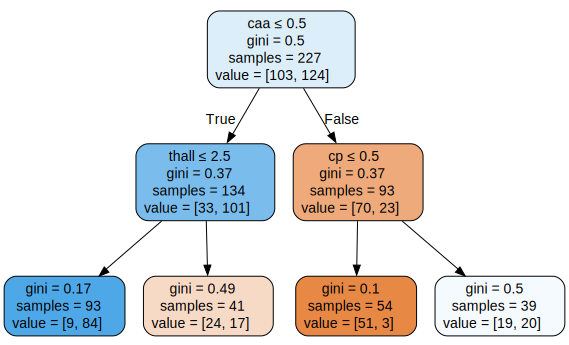

In [71]:
draw_tree(m, trn_indep3, size=10)

In [74]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(val_y, m.predict(val_xs))

0.17105263157894737

In [75]:
import pickle
with open('heart2.pkl', 'wb') as arquivo:
    pickle.dump(m, arquivo)